<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/lotterry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery.xlsx - since 30 years ago.csv')

In [6]:
lotto = lotto.drop(columns=['Date','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [7]:
lotto

,DATE,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/1/2024,980116,16,116,17,104,763,634,833,4,Wednesday
1,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
2,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
3,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
4,3/1/2024,253603,3,603,79,900,975,382,703,6,Friday
...,...,...,...,...,...,...,...,...,...,...,...
716,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
717,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
718,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
719,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [8]:
lotto.isnull().any()

DATE           False
รางวัลที่ 1    False
2 ตัวบน        False
3 ตัวบน        False
2 ตัวล่าง      False
3 ตัวหน้า      False
3 ตัวหน้า.1    False
3 ตัวล่าง      False
3 ตัวล่าง.1    False
weekday_dum    False
weekday        False
dtype: bool

In [9]:
lotto.rename(columns={'DATE': 'Date','รางวัลที่ 1': '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [10]:
lotto

,Date,1st,2 ตัวบน,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/1/2024,980116,16,116,17,104,763,634,833,4,Wednesday
1,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
2,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
3,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
4,3/1/2024,253603,3,603,79,900,975,382,703,6,Friday
...,...,...,...,...,...,...,...,...,...,...,...
716,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
717,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
718,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
719,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [11]:
ls= lotto.iloc[:,9:11]

In [12]:
lu= lotto.iloc[:,0:5]

In [13]:
lt = pd.concat([lu, ls], axis=1)

In [14]:
lt

,Date,1st,2 ตัวบน,top3,up2,weekday_dum,weekday
0,5/1/2024,980116,16,116,17,4,Wednesday
1,4/16/2024,943598,98,598,79,3,Tuesday
2,4/1/2024,803481,81,481,90,2,Monday
3,3/16/2024,997626,26,626,78,7,Saturday
4,3/1/2024,253603,3,603,79,6,Friday
...,...,...,...,...,...,...,...
716,5/16/1994,2071764,64,764,29,2,Monday
717,5/2/1994,3072877,77,877,69,2,Monday
718,4/16/1994,7893913,13,913,21,7,Saturday
719,4/1/1994,4269815,15,815,29,6,Friday


In [15]:
lt = lt.drop(columns=['2 ตัวบน'])

In [16]:
lt

,Date,1st,top3,up2,weekday_dum,weekday
0,5/1/2024,980116,116,17,4,Wednesday
1,4/16/2024,943598,598,79,3,Tuesday
2,4/1/2024,803481,481,90,2,Monday
3,3/16/2024,997626,626,78,7,Saturday
4,3/1/2024,253603,603,79,6,Friday
...,...,...,...,...,...,...
716,5/16/1994,2071764,764,29,2,Monday
717,5/2/1994,3072877,877,69,2,Monday
718,4/16/1994,7893913,913,21,7,Saturday
719,4/1/1994,4269815,815,29,6,Friday


In [17]:
lt.dtypes

Date           object
1st             int64
top3            int64
up2             int64
weekday_dum     int64
weekday        object
dtype: object

In [18]:
more = lt[lt['1st'] >= 999999]
more.count()

Date           20
1st            20
top3           20
up2            20
weekday_dum    20
weekday        20
dtype: int64

In [19]:
lt = lt[lt['1st'] <= 999999]

In [20]:
lt['up2'] = lt['up2'].apply(lambda x: '{:02}'.format(x))

In [21]:
lt['top3'] = lt['top3'].apply(lambda x: '{:03}'.format(x))

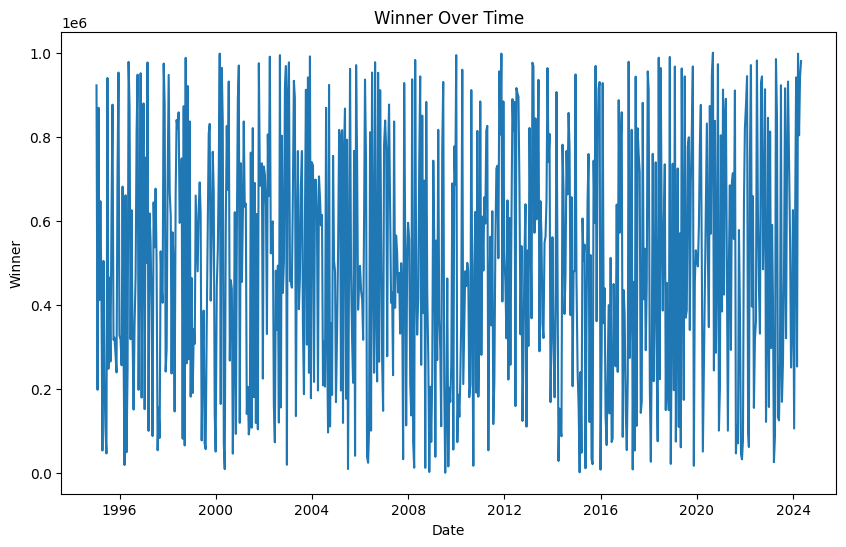

In [22]:
lt['Date'] = pd.to_datetime(lt['Date'])
plt.figure(figsize=(10,6))
plt.plot(lt['Date'], lt['1st'])
plt.title('Winner Over Time')
plt.xlabel('Date')
plt.ylabel('Winner')

plt.show()

<Axes: ylabel='1st'>

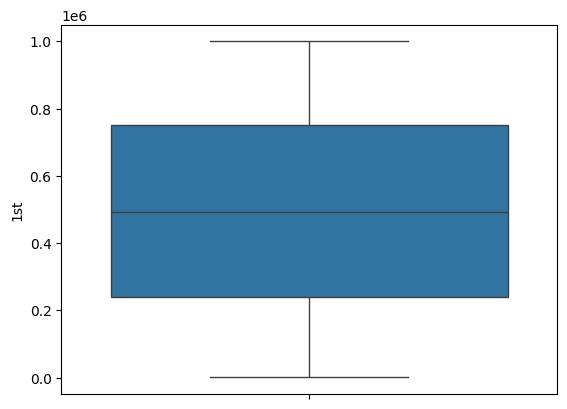

In [23]:
sns.boxplot(data=lt['1st'])

<Axes: ylabel='top3'>

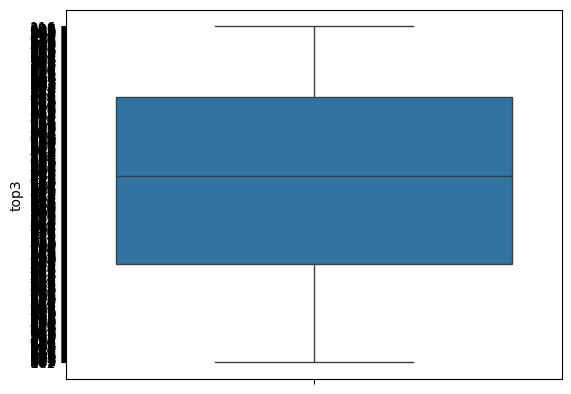

In [24]:
sns.boxplot(data=lt['top3'])

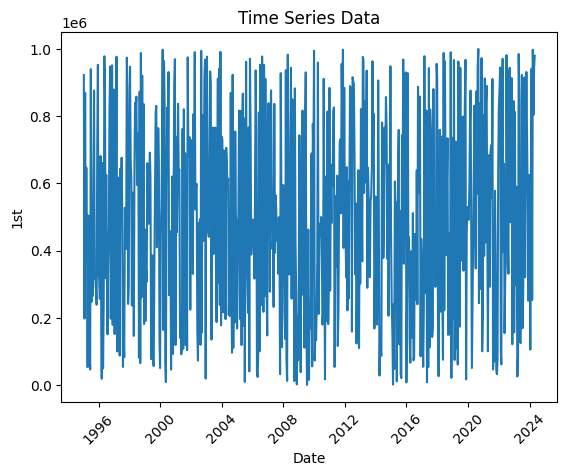

In [25]:
# Plot the time-series data
plt.plot(lt['Date'], lt['1st'])
plt.xlabel('Date')
plt.ylabel('1st')
plt.xticks(rotation = 45)
plt.title('Time Series Data')
plt.show()

In [26]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Create and fit the AR model
model = AutoReg(lt['1st'], lags=1)
ar_model = model.fit()

# Make predictions
predictions = ar_model.predict(start=len(lt), end=len(lt)+3)  # Replace 3 with the number of future values to predict

print(predictions)


701    480915.871005
702    497225.550477
703    496623.008149
704    496645.268382
dtype: float64


## Split Date

In [27]:
lt['Year'] = pd.to_datetime(lt['Date']).dt.year
lt['Month'] = pd.to_datetime(lt['Date']).dt.month
lt['Day'] = pd.to_datetime(lt['Date']).dt.day

In [28]:
lt_1 = lt

In [29]:
lt_1['up2'] = lt_1['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['Tens digit'] = lt_1['up2'].apply(lambda x: int(x[0]))
lt_1['Units digit'] = lt_1['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [30]:
lt_1['top3'] = lt_1['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['c3_r1'] = lt_1['top3'].apply(lambda x: int(x[0]))
lt_1['c3_r2'] = lt_1['top3'].apply(lambda x: int(x[1]))
lt_1['c3_r3'] = lt_1['top3'].apply(lambda x: int(x[2]))

In [31]:
lt_1

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
697,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
698,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
699,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


## เลือกแค่ 3 ปีย้อนหลัง

In [32]:
three_y = lt[lt['Date'] >= '2021-01-01']
three_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-03-16,890422,422,19,3,Tuesday,2021,3,16,1,9,4,2,2
76,2021-03-01,835538,538,73,2,Monday,2021,3,1,7,3,5,3,8
77,2021-02-16,424603,603,39,3,Tuesday,2021,2,16,3,9,6,0,3
78,2021-02-01,912307,307,97,2,Monday,2021,2,1,9,7,3,0,7


In [33]:
grouped_counts = three_y.groupby('up2').size().reset_index(name='Count')
grouped_counts

,up2,Count
0,02,1
1,03,1
2,05,1
3,06,1
4,07,1
5,08,1
6,09,3
7,10,1
8,11,1
9,14,4


In [34]:
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
9,14,4


In [35]:
three_y['up2_2'] = three_y['up2'].astype(str)

In [36]:
three_y['up2'] = three_y['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
three_y['Tens digit'] = three_y['up2'].apply(lambda x: int(x[0]))
three_y['Units digit'] = three_y['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [37]:
three_y['top3'] = three_y['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
three_y['c3_r1'] = three_y['top3'].apply(lambda x: int(x[0]))
three_y['c3_r2'] = three_y['top3'].apply(lambda x: int(x[1]))
three_y['c3_r3'] = three_y['top3'].apply(lambda x: int(x[2]))

In [38]:
three_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3,up2_2
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6,17
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8,79
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1,90
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6,78
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-03-16,890422,422,19,3,Tuesday,2021,3,16,1,9,4,2,2,19
76,2021-03-01,835538,538,73,2,Monday,2021,3,1,7,3,5,3,8,73
77,2021-02-16,424603,603,39,3,Tuesday,2021,2,16,3,9,6,0,3,39
78,2021-02-01,912307,307,97,2,Monday,2021,2,1,9,7,3,0,7,97


In [39]:
three_y = three_y.drop(columns=['up2_2'])

In [40]:
three_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-03-16,890422,422,19,3,Tuesday,2021,3,16,1,9,4,2,2
76,2021-03-01,835538,538,73,2,Monday,2021,3,1,7,3,5,3,8
77,2021-02-16,424603,603,39,3,Tuesday,2021,2,16,3,9,6,0,3
78,2021-02-01,912307,307,97,2,Monday,2021,2,1,9,7,3,0,7


### หาค่าซ้ำเลขท้าย 2 ตัวหลักที่ 1

In [41]:
grouped_counts = three_y.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
1,1,13


### หาค่าซ้ำเลขท้าย 2 ตัวหลักที่ 2

In [42]:
grouped_counts = three_y.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
9,9,13


### สรุปเลขท้าย 2 ของข้อมูล 3 ปีย้อนหลังทั้งหมด
- ตัวที่ซ้ำกันมากที่สุดคือ 14
- หลักแรกคือ 1 หลักที่2 คือ 9
- ดังนั้นเลขที่จะออกคือ 14 และ 19

# 6 ปีย้อนหลัง group by Thursday



In [43]:
six_y = lt[lt['Date'] >= '2018-01-01']
six_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2018-03-16,218559,559,82,6,Friday,2018,3,16,8,2,5,5,9
145,2018-03-02,759415,415,29,6,Friday,2018,3,2,2,9,4,1,5
146,2018-02-16,309915,915,39,6,Friday,2018,2,16,3,9,9,1,5
147,2018-02-01,26853,853,31,5,Thursday,2018,2,1,3,1,8,5,3


In [44]:
Th = six_y[six_y['weekday'] == "Thursday"]

In [45]:
Th.count()

Date           23
1st            23
top3           23
up2            23
weekday_dum    23
weekday        23
Year           23
Month          23
Day            23
Tens digit     23
Units digit    23
c3_r1          23
c3_r2          23
c3_r3          23
dtype: int64

In [46]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = Th.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
2,09,2
11,58,2
17,83,2


In [47]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = Th.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
4,5,5


In [48]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = Th.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
3,3,4
9,9,4


### สรุปเลขท้าย 2 ของงวดวันพฤหัส 6 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 09 58 83 ทั้งหมด
- หลักที่1 คือ 5 หลักที่2 คือ 3 และ 9
- ดังนั้นเลขที่จะออกคือ 09, 58, 83, 53 และอาจจะออก 59

# ทำนายงวด 16 พฤษภาคม

## เลขท้าย 2 ตัว

In [49]:
may_16 = lt_1[(lt_1['Month'] == 5) & (lt_1['Day'] == 16)]
may_16

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
23,2023-05-16,132903,903,99,3,Tuesday,2023,5,16,9,9,9,0,3
47,2022-05-16,155012,012,06,2,Monday,2022,5,16,0,6,0,1,2
71,2021-05-16,684579,579,14,1,Sunday,2021,5,16,1,4,5,7,9
116,2019-05-16,962526,526,71,5,Thursday,2019,5,16,7,1,5,2,6
140,2018-05-16,75629,629,20,4,Wednesday,2018,5,16,2,0,6,2,9
164,2017-05-16,454891,891,53,3,Tuesday,2017,5,16,5,3,8,9,1
188,2016-05-16,141737,737,98,2,Monday,2016,5,16,9,8,7,3,7
212,2015-05-16,11421,421,38,7,Saturday,2015,5,16,3,8,4,2,1
236,2014-05-16,87523,523,20,6,Friday,2014,5,16,2,0,5,2,3
260,2013-05-16,687125,125,56,5,Thursday,2013,5,16,5,6,1,2,5


In [50]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = may_16.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
6,20,3


In [51]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
4,5,5


In [52]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
6,6,5


In [53]:
# งวดปีล่าสุด
may_16[(may_16['Year'] == 2023)]

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
23,2023-05-16,132903,903,99,3,Tuesday,2023,5,16,9,9,9,0,3


### สรุปเลขท้าย 2 ของงวดวันที่ 16-May 30 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 20 ทั้งหมด
- หลักที่1 คือ 5 หลักที่2 คือ 6
- งวดล่าสุดของปีที่แล้วคือ 99
- ดังนั้นเลขที่จะออกคือ 20, 56 และอาจจะออก 99

## เลขท้าย 3 ตัว

In [54]:
# เลขท้าย 3 ตัวที่ออกบ่อยที่สุด
grouped_counts = may_16.groupby('top3').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,top3,Count
0,012,2


In [55]:
# เลขท้ายสามตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('c3_r1').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r1,Count
0,0,4
4,4,4


In [56]:
# เลขท้ายสามตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('c3_r2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r2,Count
1,1,8


In [57]:
# เลขท้ายสามตัวหลักที่ 3 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('c3_r3').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r3,Count
6,7,5


### สรุปเลขท้าย 3 ของงวดวันที่ 16-May 30 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 012 ทั้งหมด
- หลักที่1 คือ 0,4 หลักที่2 คือ 1 หลักที่3 คือ 7
- งวดล่าสุดของปีที่แล้วคือ 903
- ดังนั้นเลขที่จะออกคือ 012 และ
  017 หรือ 417 และอาจจะออก 903

# ตรวจสอบความแม่น โดยทำนายงวดที่ 1 พฤษภา 30ปีย้อนหลัง

## เลขท้าย 2 ตัว

In [58]:
may_2 = lt_1[(lt_1['Month'] == 5) & (lt_1['Day'] == 2)]
may_2

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
24,2023-05-02,843019,019,65,3,Tuesday,2023,5,2,6,5,0,1,9
48,2022-05-02,658642,642,09,2,Monday,2022,5,2,0,9,6,4,2
72,2021-05-02,501272,272,18,1,Sunday,2021,5,2,1,8,2,7,2
117,2019-05-02,61324,324,25,5,Thursday,2019,5,2,2,5,3,2,4
141,2018-05-02,248038,038,85,4,Wednesday,2018,5,2,8,5,0,3,8
165,2017-05-02,8656,656,35,3,Tuesday,2017,5,2,3,5,6,5,6
189,2016-05-02,399459,459,02,2,Monday,2016,5,2,0,2,4,5,9
213,2015-05-02,543466,466,30,7,Saturday,2015,5,2,3,0,4,6,6
237,2014-05-02,103297,297,52,6,Friday,2014,5,2,5,2,2,9,7
261,2013-05-02,603458,458,07,5,Thursday,2013,5,2,0,7,4,5,8


In [59]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = may_2.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
24,85,2


In [60]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
0,0,4
2,2,4
8,8,4


In [61]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
5,5,6


In [62]:
# งวดปีล่าสุด
may_2[(may_2['Year'] == 2023)]

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
24,2023-05-02,843019,019,65,3,Tuesday,2023,5,2,6,5,0,1,9


### สรุปเลขท้าย 2 ของงวดวันที่ 16-May 30 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 85 ทั้งหมด
- หลักที่1 คือ 0 2 8 หลักที่2 คือ 5
- งวดล่าสุดของปีที่แล้วคือ 65
- ดังนั้นเลขที่จะออกคือ 85, 05, 25, 85 และอาจจะออก 65

In [63]:
# ประเมินผล model ว่าออกจริงมั้ย
lt_1[(lt_1['Month'] == 5) & (lt_1['Day'] == 1)]

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6


## เลขท้าย 3 ตัว

In [64]:
# เลขท้ายสามตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('c3_r1').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r1,Count
4,4,8


In [65]:
# เลขท้ายสามตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('c3_r2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r2,Count
5,5,6


In [66]:
# เลขท้ายสามตัวหลักที่ 3 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('c3_r3').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r3,Count
0,1,4
1,2,4
3,4,4
6,7,4


# พยากรณ์ล่วงหน้า 1 งวด

In [67]:
t = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery.xlsx - for_predict_t+1.csv')

In [68]:
t0 = t.drop(columns=['Date','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [69]:
t0.isnull().any()

Date(t)     False
top3(t)     False
up2(t+1)    False
dtype: bool

In [70]:
t0.dtypes

Date(t)     object
top3(t)      int64
up2(t+1)     int64
dtype: object

In [71]:
t1 = t0.copy()

In [72]:
t1

,Date(t),top3(t),up2(t+1)
0,5/1/2024,116,79
1,4/16/2024,598,90
2,4/1/2024,481,78
3,3/16/2024,626,79
4,3/1/2024,603,43
...,...,...,...
715,6/1/1994,804,29
716,5/16/1994,764,69
717,5/2/1994,877,21
718,4/16/1994,913,29


In [73]:
import matplotlib.pyplot as plt
from scipy import stats

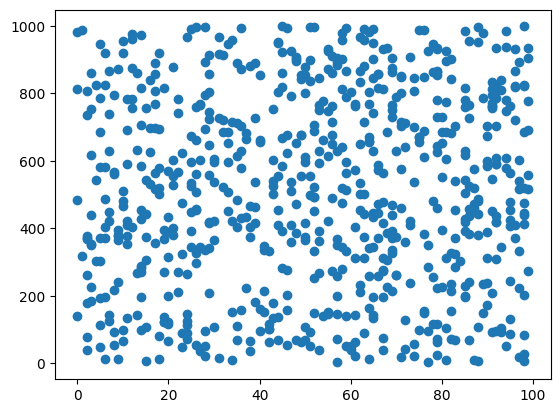

In [74]:
plt.scatter(t1['up2(t+1)'], t1['top3(t)'])
plt.show()

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = t1[['up2(t+1)']]  # Note the double brackets to keep X as a 2D array
y = t1['top3(t)']

model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 479.1212437078455
Coefficient: 0.573865611187357


In [76]:
new_X = np.array([[17]])
new_y_pred = model.predict(new_X)
print(f"Predicted y value for x = 17: {new_y_pred[0]}")

Predicted y value for x = 17: 488.87695909803057


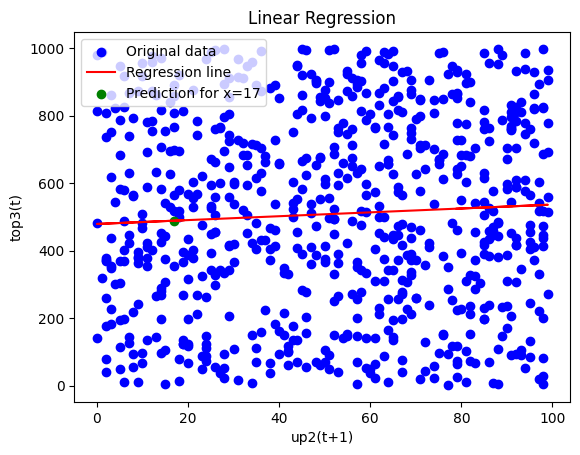

In [77]:
# Predict y for the given X values to plot the regression line
y_pred = model.predict(X)

# Plot the original data points
plt.scatter(t1['up2(t+1)'], t1['top3(t)'], color='blue', label='Original data')

# Plot the regression line
plt.plot(t1['up2(t+1)'], y_pred, color='red', label='Regression line')

# Plot the new prediction
plt.scatter(new_X, new_y_pred, color='green', label='Prediction for x=17')

# Add title and labels
plt.title('Linear Regression')
plt.xlabel('up2(t+1)')
plt.ylabel('top3(t)')
plt.legend()

# Show the plot
plt.show()

R^2: 0.0033723400433175454


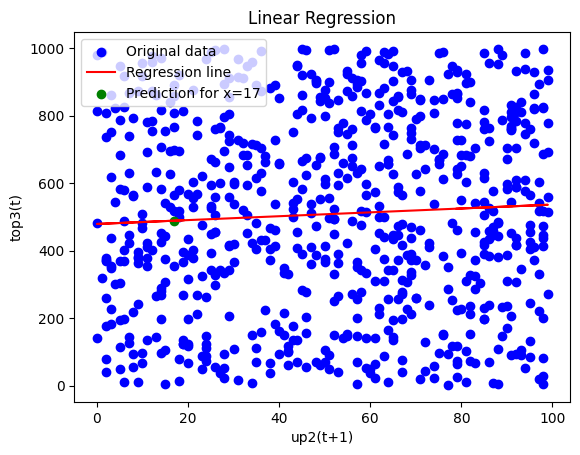

In [78]:
# Calculate and print R^2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

# Plot the original data points
plt.scatter(t1['up2(t+1)'], t1['top3(t)'], color='blue', label='Original data')

# Plot the regression line
plt.plot(t1['up2(t+1)'], y_pred, color='red', label='Regression line')

# Plot the new prediction
plt.scatter(new_X, new_y_pred, color='green', label='Prediction for x=17')

# Add title and labels
plt.title('Linear Regression')
plt.xlabel('up2(t+1)')
plt.ylabel('top3(t)')
plt.legend()

# Show the plot
plt.show()

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict y for the given X values
y_pred = model.predict(X)
print(f"Predicted y values: {y_pred}")

# Predict y for a new value of x = 17
new_X = np.array([[17]])
new_y_pred = model.predict(new_X)
print(f"Predicted y value for x = 17: {new_y_pred[0]}")

# Calculate and print R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

# Calculate error metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Predicted y values: [524.45662699 530.76914871 523.88276138 524.45662699 503.79746499
 484.28603421 514.12704599 530.1952831  527.89982066 531.34301433
 487.15536226 515.27477721 504.3713306  516.99637405 505.51906182
 531.34301433 517.57023966 485.43376543 514.7009116  488.30309349
 496.33721204 484.28603421 535.93393922 516.42250844 519.8657021
 535.93393922 521.01343332 510.68385232 525.0304926  531.91687994
 506.09292743 512.40544916 487.15536226 483.7121686  515.84864282
 519.29183649 487.72922788 507.81452427 522.16116455 526.75208944
 503.22359938 487.15536226 509.5361211  514.12704599 531.91687994
 480.26897493 482.56443737 484.28603421 512.40544916 484.85989982
 480.84284054 483.13830299 511.83158355 496.33721204 531.91687994
 499.78040571 526.75208944 526.17822383 511.83158355 533.63847677
 500.92813693 526.75208944 530.76914871 524.45662699 492.32015277
 518.71797088 519.29183649 495.76334643 488.8769591  504.94519621
 487.15536226 489.45082471 511.25771793 481.99057176 490.

# งวดวันที่ 1 มิถุนายน

## วันเสาร์ 6 ปีย้อนหลัง

In [80]:
Su = six_y[six_y['weekday'] == "Saturday"]

In [81]:
Su

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
8,2023-12-30,625544,544,89,7,Saturday,2023,12,30,8,9,5,4,4
9,2023-12-16,356757,757,85,7,Saturday,2023,12,16,8,5,7,5,7
15,2023-09-16,320812,812,46,7,Saturday,2023,9,16,4,6,8,1,2
20,2023-07-01,922605,605,16,7,Saturday,2023,7,1,1,6,6,0,5
26,2023-04-01,87907,907,99,7,Saturday,2023,4,1,9,9,9,0,7
38,2022-10-01,484669,669,50,7,Saturday,2022,10,1,5,0,6,6,9
43,2022-07-16,620405,405,53,7,Saturday,2022,7,16,5,3,4,0,5
49,2022-04-16,395919,919,58,7,Saturday,2022,4,16,5,8,9,1,9
61,2021-10-16,386372,372,38,7,Saturday,2021,10,16,3,8,3,7,2


In [82]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = Su.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
5,46,3


In [83]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = Su.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
5,5,4


In [84]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = Su.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
5,6,7


### สรุปเลขท้าย 2 ของงวดเสาร์ 6 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 46
- หลักที่1 คือ 5 หลักที่6
- ดังนั้นเลขที่จะออกคือ 46 และ 56

### เลข 3 ตัว

In [85]:
# เลขท้ายสามตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = Su.groupby('c3_r1').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r1,Count
5,6,4


In [86]:
# เลขท้ายสามตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = Su.groupby('c3_r2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r2,Count
2,2,5


In [87]:
# เลขท้ายสามตัวหลักที่ 3 ที่ออกบ่อยสุด
grouped_counts = Su.groupby('c3_r3').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r3,Count
1,1,3
7,7,3


621
627

# TRANSFORMERS MODEL

In [88]:
lt_1

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
697,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
698,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
699,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


In [89]:
d = lt_1.copy()

In [90]:
d

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
697,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
698,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
699,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


In [91]:
data = d.copy()

In [92]:
data

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
697,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
698,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
699,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


In [93]:
data['up2'] = data['up2'].astype(int)

In [94]:
def map_values(x):
    if 0 <= x <= 20:
        return 0
    elif 21 <= x <= 40:
        return 1
    elif 41 <= x <= 60:
        return 2
    elif 61 <= x <= 80:
        return 3
    elif 81 <= x <= 99:
        return 4
    else:
        return x  # Return the original value if it doesn't fall into any of the specified ranges

# Apply the function to the 'up2' column
data['up2'] = data['up2'].apply(map_values)

In [95]:
data

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,0,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,3,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,4,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,3,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,3,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1995-03-16,646847,847,3,5,Thursday,1995,3,16,6,7,8,4,7
697,1995-03-01,411454,454,3,4,Wednesday,1995,3,1,7,1,4,5,4
698,1995-02-16,869070,070,4,5,Thursday,1995,2,16,9,5,0,7,0
699,1995-02-01,198162,162,2,4,Wednesday,1995,2,1,4,8,1,6,2


In [96]:
data['up2'].unique()

array([0, 3, 4, 2, 1])

In [97]:
x = data[['c3_r1','c3_r2','c3_r3']]
y = data['up2']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [98]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, y_train_encoded and y_test_encoded can be used as labels for training and testing the model

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble


In [100]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=20, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 665, Test set:36
Fold:2, Train set: 666, Test set:35
Fold:3, Train set: 666, Test set:35
Fold:4, Train set: 666, Test set:35
Fold:5, Train set: 666, Test set:35
Fold:6, Train set: 666, Test set:35
Fold:7, Train set: 666, Test set:35
Fold:8, Train set: 666, Test set:35
Fold:9, Train set: 666, Test set:35
Fold:10, Train set: 666, Test set:35
Fold:11, Train set: 666, Test set:35
Fold:12, Train set: 666, Test set:35
Fold:13, Train set: 666, Test set:35
Fold:14, Train set: 666, Test set:35
Fold:15, Train set: 666, Test set:35
Fold:16, Train set: 666, Test set:35
Fold:17, Train set: 666, Test set:35
Fold:18, Train set: 666, Test set:35
Fold:19, Train set: 666, Test set:35
Fold:20, Train set: 666, Test set:35


In [101]:
earlystopping = EarlyStopping(
         min_delta = 0.001,
         patience = 20,
         restore_best_weights = True
)


In [102]:
#using sequential model to create neural network
#regularizer and dropouts are used for avoid overfitting
#'relu' and 'softmax' activation functions are applied to create neural network

model = Sequential([
    Flatten(),
    BatchNormalization(),
    Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation = 'softmax')
])

In [103]:
#while using a few features for classification sparse categorical crossentropy loss function is mainly used
opt = Adam(learning_rate=0.001)
model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#fitting model to predict and evaluate the data
history = model.fit(
    x_train, y_train,
    epochs = 100, batch_size = 128,
    validation_data = (x_test, y_test),callbacks = [earlystopping]
)


Epoch 1/100
5/5 [==============================] - 5s 109ms/step - loss: 4.4518 - accuracy: 0.1943 - val_loss: 3.8908 - val_accuracy: 0.2386
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 4.3057 - accuracy: 0.2057 - val_loss: 3.8199 - val_accuracy: 0.2102
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 4.2929 - accuracy: 0.1943 - val_loss: 3.7723 - val_accuracy: 0.2159
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 4.2185 - accuracy: 0.2019 - val_loss: 3.7417 - val_accuracy: 0.2216
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 4.1183 - accuracy: 0.2419 - val_loss: 3.7271 - val_accuracy: 0.2045
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 4.0896 - accuracy: 0.2248 - val_loss: 3.7177 - val_accuracy: 0.1705
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 4.0780 - accuracy: 0.2171 - val_loss: 3.7107 - val_accuracy: 0.1534
Epoch 8/100
5/5 [==

In [104]:
pre = model.predict(x_test)
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 2.5113 - accuracy: 0.1534


[2.511335611343384, 0.15340909361839294]

<Axes: >

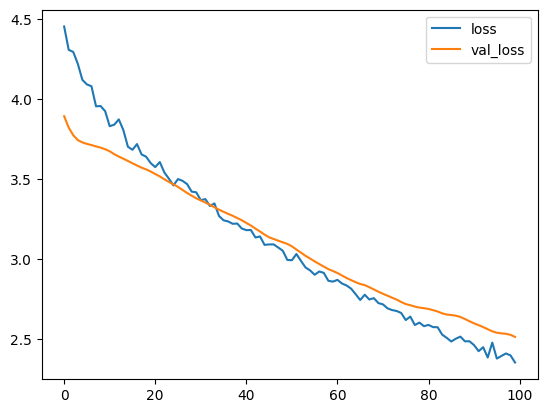

In [105]:
#The graph shows that loss and validation loss is decreasing which means our model performs well
dataframe = pd.DataFrame(history.history)
dataframe.loc[:,['loss','val_loss']].plot()

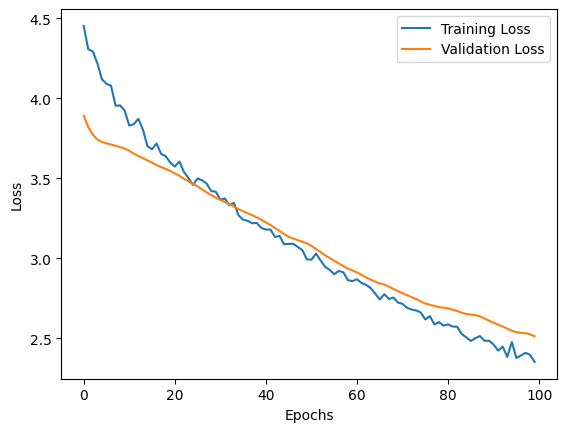

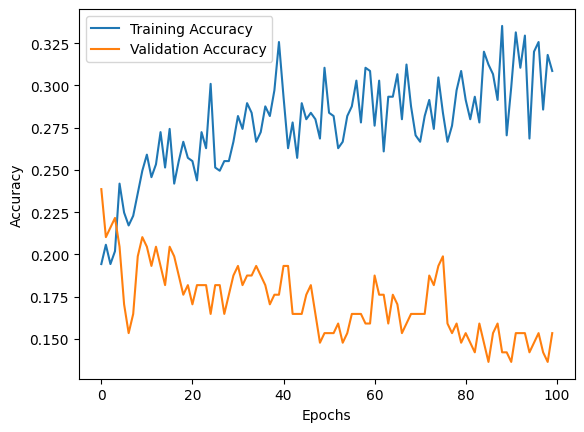

In [106]:
import matplotlib.pyplot as plt

# วาดกราฟความสูญเสีย (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# วาดกราฟความแม่นยำ (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [107]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame()
df['tonry'] = range(5)

print(df)

   tonry
0      0
1      1
2      2
3      3
4      4


In [108]:
dict_ = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4
}

In [109]:
#this function is used in order to determine the weather pattern
def find_key(dict_, value):
    for key, val in dict_.items():
        if val == value:
            return key
    return None

In [110]:
#precipitation: 3; A: 1; B= 1; C: 6
x_example = [[
    1,1,6
]]

y_probs = model.predict(x_example)
y_pred = np.argmax(y_probs, axis=1)
threshold = 0.265
y_pred_thresh = (y_probs > threshold).astype(int)
n = 0
for i in y_pred_thresh:
    n=0
    for j in i:
        if(j == 1):
            print(find_key(dict_, n))
        n+=1

1/1 [==============================] - 0s 36ms/step
4


# ทำนายล่วงหน้า 1

In [111]:
t1

,Date(t),top3(t),up2(t+1)
0,5/1/2024,116,79
1,4/16/2024,598,90
2,4/1/2024,481,78
3,3/16/2024,626,79
4,3/1/2024,603,43
...,...,...,...
715,6/1/1994,804,29
716,5/16/1994,764,69
717,5/2/1994,877,21
718,4/16/1994,913,29


In [112]:
t1['top3(t)'] = t1['top3(t)'].apply(lambda x: '{:03}'.format(x))

In [113]:
t1['top3(t)'] = t1['top3(t)'].astype(str)

# Split each value in the 'digi' column into its individual digits
t1['c3_r1'] = t1['top3(t)'].apply(lambda x: int(x[0]))
t1['c3_r2'] = t1['top3(t)'].apply(lambda x: int(x[1]))
t1['c3_r3'] = t1['top3(t)'].apply(lambda x: int(x[2]))

In [114]:
t1

,Date(t),top3(t),up2(t+1),c3_r1,c3_r2,c3_r3
0,5/1/2024,116,79,1,1,6
1,4/16/2024,598,90,5,9,8
2,4/1/2024,481,78,4,8,1
3,3/16/2024,626,79,6,2,6
4,3/1/2024,603,43,6,0,3
...,...,...,...,...,...,...
715,6/1/1994,804,29,8,0,4
716,5/16/1994,764,69,7,6,4
717,5/2/1994,877,21,8,7,7
718,4/16/1994,913,29,9,1,3


In [115]:
data = t1

In [116]:
data

,Date(t),top3(t),up2(t+1),c3_r1,c3_r2,c3_r3
0,5/1/2024,116,79,1,1,6
1,4/16/2024,598,90,5,9,8
2,4/1/2024,481,78,4,8,1
3,3/16/2024,626,79,6,2,6
4,3/1/2024,603,43,6,0,3
...,...,...,...,...,...,...
715,6/1/1994,804,29,8,0,4
716,5/16/1994,764,69,7,6,4
717,5/2/1994,877,21,8,7,7
718,4/16/1994,913,29,9,1,3


In [117]:
data['up2(t+1)'] = data['up2(t+1)'].astype(int)

In [118]:
def map_values(x):
    if 0 <= x <= 20:
        return 0
    elif 21 <= x <= 40:
        return 1
    elif 41 <= x <= 60:
        return 2
    elif 61 <= x <= 80:
        return 3
    elif 81 <= x <= 99:
        return 4
    else:
        return x  # Return the original value if it doesn't fall into any of the specified ranges

# Apply the function to the 'up2' column
data['up2(t+1)'] = data['up2(t+1)'].apply(map_values)

In [119]:
data

,Date(t),top3(t),up2(t+1),c3_r1,c3_r2,c3_r3
0,5/1/2024,116,3,1,1,6
1,4/16/2024,598,4,5,9,8
2,4/1/2024,481,3,4,8,1
3,3/16/2024,626,3,6,2,6
4,3/1/2024,603,2,6,0,3
...,...,...,...,...,...,...
715,6/1/1994,804,1,8,0,4
716,5/16/1994,764,3,7,6,4
717,5/2/1994,877,1,8,7,7
718,4/16/1994,913,1,9,1,3


In [120]:
data['up2(t+1)'].unique()

array([3, 4, 2, 0, 1])

In [121]:
x = data[['c3_r1','c3_r2','c3_r3']]
y = data['up2(t+1)']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [122]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, y_train_encoded and y_test_encoded can be used as labels for training and testing the model

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble


In [124]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=20, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 684, Test set:36
Fold:2, Train set: 684, Test set:36
Fold:3, Train set: 684, Test set:36
Fold:4, Train set: 684, Test set:36
Fold:5, Train set: 684, Test set:36
Fold:6, Train set: 684, Test set:36
Fold:7, Train set: 684, Test set:36
Fold:8, Train set: 684, Test set:36
Fold:9, Train set: 684, Test set:36
Fold:10, Train set: 684, Test set:36
Fold:11, Train set: 684, Test set:36
Fold:12, Train set: 684, Test set:36
Fold:13, Train set: 684, Test set:36
Fold:14, Train set: 684, Test set:36
Fold:15, Train set: 684, Test set:36
Fold:16, Train set: 684, Test set:36
Fold:17, Train set: 684, Test set:36
Fold:18, Train set: 684, Test set:36
Fold:19, Train set: 684, Test set:36
Fold:20, Train set: 684, Test set:36


In [125]:
earlystopping = EarlyStopping(
         min_delta = 0.001,
         patience = 20,
         restore_best_weights = True
)


In [126]:
#using sequential model to create neural network
#regularizer and dropouts are used for avoid overfitting
#'relu' and 'softmax' activation functions are applied to create neural network

model = Sequential([
    Flatten(),
    BatchNormalization(),
    Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation = 'softmax')
])

In [127]:
#while using a few features for classification sparse categorical crossentropy loss function is mainly used
opt = Adam(learning_rate=0.001)
model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#fitting model to predict and evaluate the data
history = model.fit(
    x_train, y_train,
    epochs = 100, batch_size = 128,
    validation_data = (x_test, y_test),callbacks = [earlystopping]
)


Epoch 1/100
5/5 [==============================] - 3s 97ms/step - loss: 4.4596 - accuracy: 0.1981 - val_loss: 3.7962 - val_accuracy: 0.2000
Epoch 2/100
5/5 [==============================] - 0s 19ms/step - loss: 4.1696 - accuracy: 0.2259 - val_loss: 3.7699 - val_accuracy: 0.1889
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 4.1349 - accuracy: 0.2426 - val_loss: 3.7507 - val_accuracy: 0.1889
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 4.0992 - accuracy: 0.2537 - val_loss: 3.7271 - val_accuracy: 0.1778
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 4.0684 - accuracy: 0.2241 - val_loss: 3.7057 - val_accuracy: 0.1778
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 3.9461 - accuracy: 0.2389 - val_loss: 3.6867 - val_accuracy: 0.1944
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 3.8616 - accuracy: 0.2815 - val_loss: 3.6676 - val_accuracy: 0.2167
Epoch 8/100
5/5 [===

In [128]:
pre = model.predict(x_test)
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 2.2149 - accuracy: 0.2278


[2.2149293422698975, 0.22777777910232544]

<Axes: >

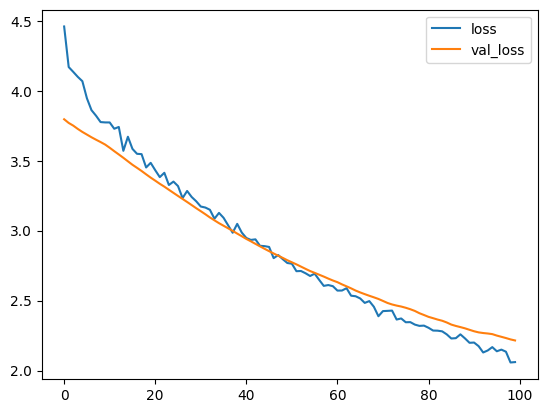

In [129]:
#The graph shows that loss and validation loss is decreasing which means our model performs well
dataframe = pd.DataFrame(history.history)
dataframe.loc[:,['loss','val_loss']].plot()

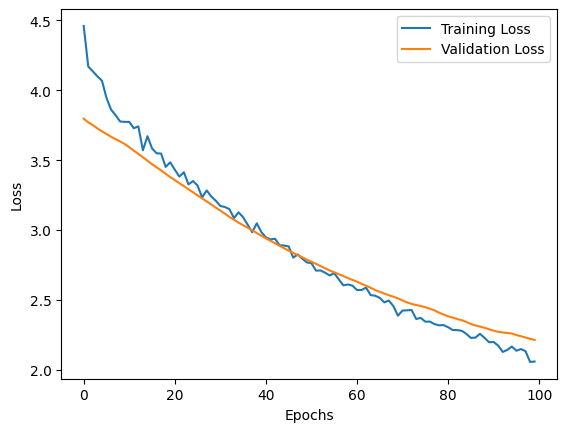

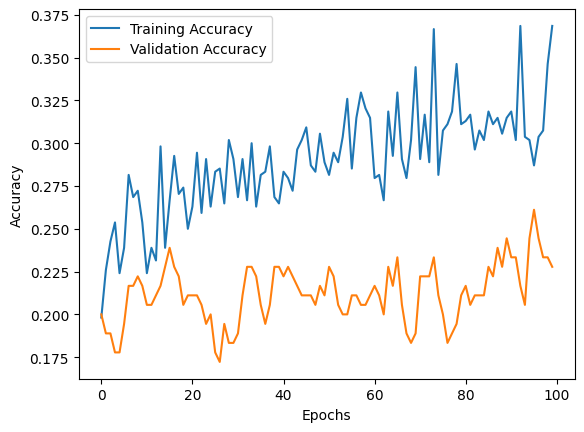

In [130]:
import matplotlib.pyplot as plt

# วาดกราฟความสูญเสีย (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# วาดกราฟความแม่นยำ (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [131]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame()
df['tonry'] = range(5)

print(df)

   tonry
0      0
1      1
2      2
3      3
4      4


In [132]:
dict_ = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4
}

In [133]:
#this function is used in order to determine the weather pattern
def find_key(dict_, value):
    for key, val in dict_.items():
        if val == value:
            return key
    return None

In [134]:
#precipitation: 3; A: 1; B= 1; C: 6
x_example = [[
    6,9,0
]]

y_probs = model.predict(x_example)
y_pred = np.argmax(y_probs, axis=1)
threshold = 0.3
y_pred_thresh = (y_probs > threshold).astype(int)
n = 0
for i in y_pred_thresh:
    n=0
    for j in i:
        if(j == 1):
            print(find_key(dict_, n))
        n+=1

1/1 [==============================] - 0s 53ms/step
0


In [135]:
t1

,Date(t),top3(t),up2(t+1),c3_r1,c3_r2,c3_r3
0,5/1/2024,116,3,1,1,6
1,4/16/2024,598,4,5,9,8
2,4/1/2024,481,3,4,8,1
3,3/16/2024,626,3,6,2,6
4,3/1/2024,603,2,6,0,3
...,...,...,...,...,...,...
715,6/1/1994,804,1,8,0,4
716,5/16/1994,764,3,7,6,4
717,5/2/1994,877,1,8,7,7
718,4/16/1994,913,1,9,1,3


-  0 x 20: 0
- 21 x 40: 1
- 41 x 60: 2
- 61 x 80: 3
- 81 x 99: 4
        

# LSTM Model

In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [137]:
df = t0.copy()

In [138]:
df

,Date(t),top3(t),up2(t+1)
0,5/1/2024,116,79
1,4/16/2024,598,90
2,4/1/2024,481,78
3,3/16/2024,626,79
4,3/1/2024,603,43
...,...,...,...
715,6/1/1994,804,29
716,5/16/1994,764,69
717,5/2/1994,877,21
718,4/16/1994,913,29


In [139]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [140]:
df1 = df.copy()
df.drop(['Date(t)'], axis=1, inplace=True)

number_of_features = df.shape[1]

In [141]:
window_length = 540
window_length

540

In [142]:
train = df.copy()
train.head((window_length+1))

,top3(t),up2(t+1)
0,116,79
1,598,90
2,481,78
3,626,79
4,603,43
...,...,...
536,706,52
537,472,48
538,5,15
539,154,82


In [143]:
train_rows = train.values.shape[0]
train_samples = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
train_labels = np.empty([ train_rows - window_length, number_of_features], dtype=float)
for i in range(0, train_rows-window_length):
    train_samples[i] = train.iloc[i : i+window_length, 0 : number_of_features]
    train_labels[i] = train.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [144]:
train_samples[0]

array([[116.,  79.],
       [598.,  90.],
       [481.,  78.],
       ...,
       [472.,  48.],
       [  5.,  15.],
       [154.,  82.]])

In [145]:
train_labels[0]

array([426.,  14.])

In [146]:
scaler = StandardScaler()
transformed_dataset = scaler.fit_transform(train.values)
scaled_train_samples = pd.DataFrame(data=transformed_dataset, index=train.index)

In [147]:
scaled_train_samples.head(window_length+1)

,0,1
0,-1.378975,0.938551
1,0.312604,1.320040
2,-0.098008,0.903870
3,0.410870,0.938551
4,0.330151,-0.309960
...,...,...
536,0.691630,0.002168
537,-0.129593,-0.136556
538,-1.768530,-1.281024
539,-1.245614,1.042593


In [148]:
x_train = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
y_train = np.empty([ train_rows - window_length, number_of_features], dtype=float)

for i in range(0, train_rows-window_length):
    x_train[i] = scaled_train_samples.iloc[i : i+window_length, 0 : number_of_features]
    y_train[i] = scaled_train_samples.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [149]:
y_train

array([[-0.29103021, -1.31570508],
       [-1.55094093, -1.45442852],
       [-1.31229489, -1.41974766],
       [ 0.30909439, -0.06719416],
       [ 0.72321546, -0.6220879 ],
       [ 1.67779963,  0.79982731],
       [-0.40333423,  0.9732316 ],
       [-0.69462278,  0.31429528],
       [ 1.66025213,  0.41833786],
       [-1.45267492, -0.83017306],
       [ 1.17243154, -0.10187502],
       [ 1.71640414, -0.24059846],
       [ 0.3757749 ,  1.14663589],
       [ 0.09852436, -0.17123674],
       [-0.84904081, -1.35038594],
       [ 0.68110146, -0.55272619],
       [-1.72992546, -0.72613048],
       [-0.2032927 ,  1.35472105],
       [ 0.58634494,  0.14089099],
       [ 1.56900511, -1.45442852],
       [-0.69462278,  1.32004019],
       [-1.14734836, -0.44868361],
       [ 0.53721193, -0.89953478],
       [ 0.25645188, -1.62783281],
       [-0.90519282,  0.00216755],
       [-0.49809075,  0.17557185],
       [-1.74045397, -1.17698165],
       [ 0.10905286, -0.30996018],
       [-0.58582826,

In [150]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse

In [151]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [152]:
import tensorflow as tf

# Check for GPU availability
physical_devices = tf.config.experimental.list_physical_devices('GPU')
num_gpus = len(physical_devices)
print("Num GPUs Available: ", num_gpus)

if num_gpus > 0:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth set for GPU")
    except Exception as e:
        print(f"Error setting memory growth: {e}")
else:
    print("No GPUs found. Ensure that your machine has a GPU and the necessary drivers are installed.")


Num GPUs Available:  0
No GPUs found. Ensure that your machine has a GPU and the necessary drivers are installed.


In [154]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a third Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(70))
# Adding the last output layer
model.add(Dense(number_of_features))

In [155]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse

In [156]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a third Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(37))
# Adding the last output layer
model.add(Dense(number_of_features))

In [157]:
model.compile(optimizer=Adam(learning_rate=0.001), loss ='mse', metrics=['accuracy'])

In [158]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=2)

Epoch 1/100
2/2 - 152s - loss: 1.0138 - accuracy: 0.5167 - 152s/epoch - 76s/step
Epoch 2/100


KeyboardInterrupt: 